# Worksheet 23

Name: Yu Han  
UID: U74808634

### Topics

- Neural Networks

## Neural Networks

Nothing to do in this worksheet except follow along in lecture / use this code to better understand Neural Networks.

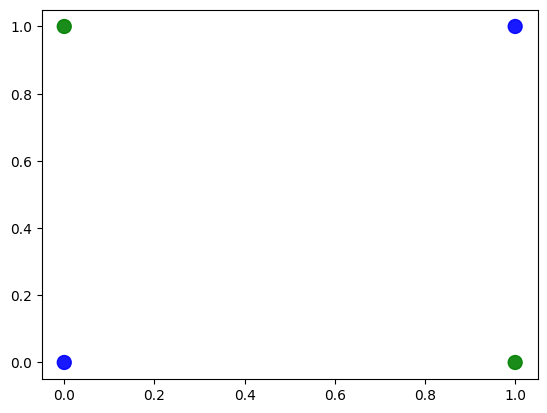

Epoch 1/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.8168
Epoch 2/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.8144
Epoch 3/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.8130
Epoch 4/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.8117
Epoch 5/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.8105
Epoch 6/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.8095
Epoch 7/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.8085
Epoch 8/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.8074
Epoch 9/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.8064
Epoch 10/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.8054
Epoch 11/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.8045
Epoch 12/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.8034
Epoch 13/1000
4/4 [==============================

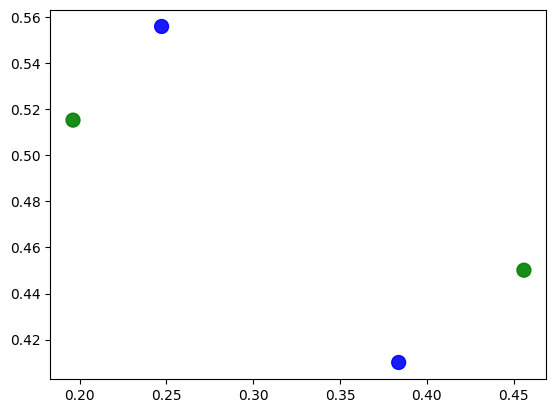

1/1 [==============================] - 0s 22ms/step


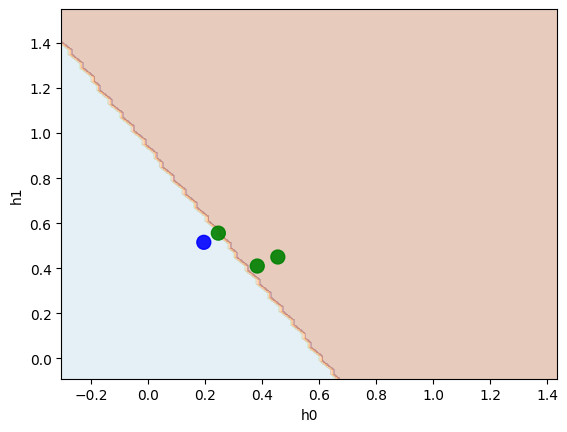

1/1 [==============================] - 0s 69ms/step


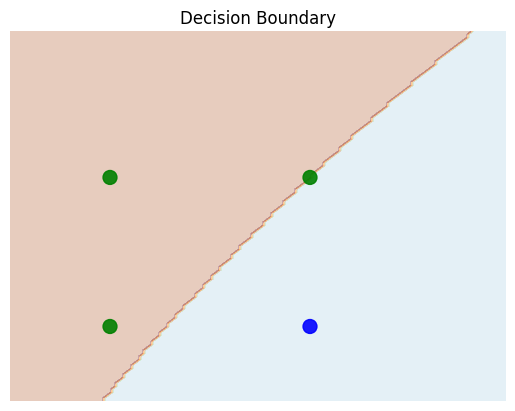

In [3]:
import math as m
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as datasets
from tensorflow import keras, math, random, stack
from tensorflow.keras import layers, initializers
from tensorflow.keras.activations import relu
 
#       x[0] --- h1 
#            \ /    \
#             X       output
#            / \    /
#       x[1] --- h2
#
# This is the base model - nothing fancy here

# Set random seed for reproducibility
np.random.seed(1)
random.set_seed(1)

# Data generation - don't modify
centers = [[0, 0]]
t, _ = datasets.make_blobs(n_samples=200, centers=centers, cluster_std=1,
                                random_state=1)

colors = np.array([x for x in 'bgrcmyk'])
colors = np.hstack([colors] * 20)

# CIRCLE
def generate_circle_data(t):
    # create some space between the classes
    X = np.array(list(filter(lambda x : (x[0] - centers[0][0])**2 + (x[1] - centers[0][1])**2 < 1 or (x[0] - centers[0][0])**2 + (x[1] - centers[0][1])**2 > 1.5, t)))
    Y = np.array([1 if (x[0] - centers[0][0])**2 + (x[1] - centers[0][1])**2 >= 1 else 0 for x in X])
    return X, Y

# LINE
def generate_line_data(t):
    # create some space between the classes
    X = np.array(list(filter(lambda x : x[0] - x[1] < -.5 or x[0] - x[1] > .5, t)))
    Y = np.array([1 if x[0] - x[1] >= 0 else 0 for x in X])
    return X, Y

# CURVE
def generate_curve_data(t):
    # create some space between the classes
    X = np.array(list(filter(lambda x : m.cos(4*x[0]) - x[1] < -.5 or m.cos(4*x[0]) - x[1] > .5, t)))
    Y = np.array([1 if m.cos(4*x[0]) - x[1] >= 0 else 0 for x in X])
    return X, Y

# XOR
def generate_xor_data():
    X = np.array([
        [0,0],
        [0,1],
        [1,0],
        [1,1]])
    Y = np.array([x[0]^x[1] for x in X])
    return X, Y

PLOT_HIDDEN_LAYER_2D = True
PLOT_HIDDEN_LAYER_3D = False

# The model - modify this
model = keras.models.Sequential()
model.add(layers.Dense(2, input_dim=2, activation="sigmoid"))
model.add(layers.Dense(1, activation="sigmoid"))
model.compile(loss="binary_crossentropy")

# X, Y = generate_circle_data(t)
# X, Y = generate_line_data(t)
# X, Y = generate_curve_data(t)
X, Y = generate_xor_data()

# plot the data
plt.scatter(X[:,0],X[:,1],color=colors[Y].tolist(), s=100, alpha=.9)
plt.show()

history = model.fit(X, Y, batch_size=1, epochs=1000)

if PLOT_HIDDEN_LAYER_2D:
    # Show the transformation of the input at the first hidden layer
    layer = model.layers[0]
    print(layer.get_config(), layer.get_weights())
    keras_function = keras.backend.function([model.input], [layer.output])
    layerVals = np.array(keras_function(X))[0]
    plt.scatter(layerVals[:,0], layerVals[:, 1], color=colors[Y].tolist(), s=100, alpha=.9)
    plt.show()

    # create a mesh to plot in
    h = .02  # step size in the mesh
    x_min, x_max = layerVals[:, 0].min() - .5, layerVals[:, 0].max() + 1
    y_min, y_max = layerVals[:, 1].min() - .5, layerVals[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                        np.arange(y_min, y_max, h))
    meshData = np.c_[xx.ravel(), yy.ravel()]

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh
    fig, ax = plt.subplots()
    layer = model.layers[-1]

    intermediateModel = keras.models.Sequential()
    intermediateModel.add(layers.Dense(1, input_dim=2, activation="sigmoid"))
    intermediateModel.compile(loss="binary_crossentropy")
    intermediateModel.layers[0].set_weights(layer.get_weights())

    Z = intermediateModel.predict(meshData)
    Z = np.array([0 if x < .5 else 1 for x in Z])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=.3, cmap=plt.cm.Paired)

    T = intermediateModel.predict(layerVals)
    T = np.array([0 if x < .5 else 1 for x in T])
    T = T.reshape(layerVals[:, 0].shape)
    ax.scatter(layerVals[:, 0], layerVals[:, 1], color=colors[T].tolist(), s=100, alpha=.9)
    ax.set_xlabel("h0")
    ax.set_ylabel("h1")
    plt.show()

if PLOT_HIDDEN_LAYER_3D:
    # Show the transformation of the input at the first hidden layer
    layer = model.layers[0]
    print(layer.get_config(), layer.get_weights())
    keras_function = keras.backend.function([model.input], [layer.output])
    layerVals = np.array(keras_function(X))[0]
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(layerVals[:,0], layerVals[:, 1], layerVals[:, 2], color=colors[Y].tolist(), s=100, alpha=.9)
    plt.show()

    # create a mesh to plot in
    h = .1  # step size in the mesh
    x_min, x_max = layerVals[:, 0].min() - .5, layerVals[:, 0].max() + 1
    y_min, y_max = layerVals[:, 1].min() - .5, layerVals[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                        np.arange(y_min, y_max, h))
    meshData = np.c_[xx.ravel(), yy.ravel(), np.zeros(len(xx.ravel()))]

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh
    fig, ax = plt.subplots()
    layer = model.layers[-1]

    intermediateModel = keras.models.Sequential()
    intermediateModel.add(layers.Dense(1, input_dim=3, activation="sigmoid"))
    intermediateModel.compile(loss="binary_crossentropy")
    intermediateModel.layers[0].set_weights(layer.get_weights())

    Z = intermediateModel.predict(meshData)
    Z = np.array([0 if x < .5 else 1 for x in Z])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=.3, cmap=plt.cm.Paired) # plot in 2D
    ax.axis('off')

    T = intermediateModel.predict(layerVals)
    T = np.array([0 if x < .5 else 1 for x in T])
    T = T.reshape(layerVals[:, 0].shape)
    ax.scatter(layerVals[:, 0], layerVals[:, 1], color=colors[T].tolist(), s=100, alpha=.9) # plot in 2D
    plt.show()

# Plot the decision boundary

# create a mesh to plot in
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
meshData = np.c_[xx.ravel(), yy.ravel()]

fig, ax = plt.subplots()
Z = model.predict(meshData)
Z = np.array([0 if x < .5 else 1 for x in Z])
Z = Z.reshape(xx.shape)
ax.contourf(xx, yy, Z, alpha=.3, cmap=plt.cm.Paired)
ax.axis('off')

# Plot also the training points
T = model.predict(X)
T = np.array([0 if x < .5 else 1 for x in T])
T = T.reshape(X[:,0].shape)
ax.scatter(X[:, 0], X[:, 1], color=colors[T].tolist(), s=100, alpha=.9)
plt.title("Decision Boundary")
plt.show()